# Data Cleaning

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#loading dataset
df = pd.read_csv('aarhus_parking_May_Nov_2014.csv')

## Cleaning data

In [3]:
#Printing first 5 values with all variables
df.head()

,vehiclecount,updatetime,_id,totalspaces,garagecode,streamtime
0,0,2014-05-22 09:09:04.145,1,65,NORREPORT,2014-11-03 16:18:44
1,0,2014-05-22 09:09:04.145,2,512,SKOLEBAKKEN,2014-11-03 16:18:44
2,869,2014-05-22 09:09:04.145,3,1240,SCANDCENTER,2014-11-03 16:18:44
3,22,2014-05-22 09:09:04.145,4,953,BRUUNS,2014-11-03 16:18:44
4,124,2014-05-22 09:09:04.145,5,130,BUSGADEHUSET,2014-11-03 16:18:44


'vehicle count' - Represents how many Vehicles were in the garage at a particular moment.

'update time' - Update time refers to the data that the sensors recorded at a particular time. 

'Total spaces' - the total amount of spaces in a certain garage.

'Stream time' - The date at which the database was fully updated(That's why the Stream time is almost unchanged overall the dataset).

All garagecodes in Aarhus city:

1.NORREPORT

2.BUSGADEHUSET

3.BRUUNS

4.SKOLEBAKKEN

5.SCANDCENTER

6.SALLING

7.MAGASIN

8.KALKVAERKSVEJ

In [5]:
# check for missing values
print(df.isnull().sum())

vehiclecount    0
updatetime      0
_id             0
totalspaces     0
garagecode      0
streamtime      0
dtype: int64


In [6]:
# check for duplicated values 
print('\nDuplicate values:')
print(df.duplicated().sum())


Duplicate values:
0


In [8]:
df.dtypes

vehiclecount     int64
updatetime      object
_id              int64
totalspaces      int64
garagecode      object
streamtime      object
dtype: object

'Upon inspecting the data there is two types of data-time formates in data'

'%Y-%m-%d %H:%M:%S.%f'

'%Y-%m-%d %H:%M:%S'

so, let's convert those datatime from 'object' to 'datetime64[ns]'

In [9]:
# Convert both formats to datetime format
df['updatetime1'] = pd.to_datetime(df['updatetime'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')
df['updatetime2'] = pd.to_datetime(df['updatetime'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Combine both columns using the combine_first method
df['cleaned_updatetime'] = df['updatetime1'].combine_first(df['updatetime2'])
df = df.drop(['updatetime','updatetime1', 'updatetime2'], axis=1)

In [10]:
df.dtypes

vehiclecount                   int64
_id                            int64
totalspaces                    int64
garagecode                    object
streamtime                    object
cleaned_updatetime    datetime64[ns]
dtype: object

# Visualizing the data

<Axes: >

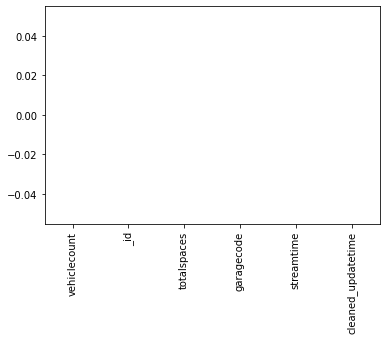

In [11]:
# Making sure if there are any missing data
df.isna().sum().plot.bar()

'The graph shows there is no empty values in our dataset'

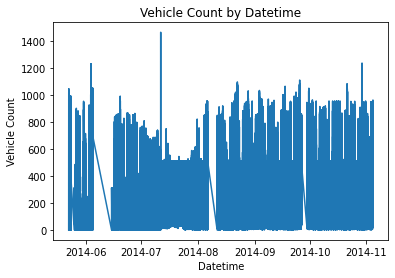

In [12]:
#Visualizing the Vehicle count of all places

fig, ax = plt.subplots()
ax.plot(df['cleaned_updatetime'], df['vehiclecount'])
# set x-axis label
ax.set_xlabel('Datetime')
# set y-axis label
ax.set_ylabel('Vehicle Count')
# set title
ax.set_title('Vehicle Count by Datetime')
# display the plot
plt.show()

'But we can't use this to analyze trafic of each garage, so let's visualize each garage vehicle count by datatime.'

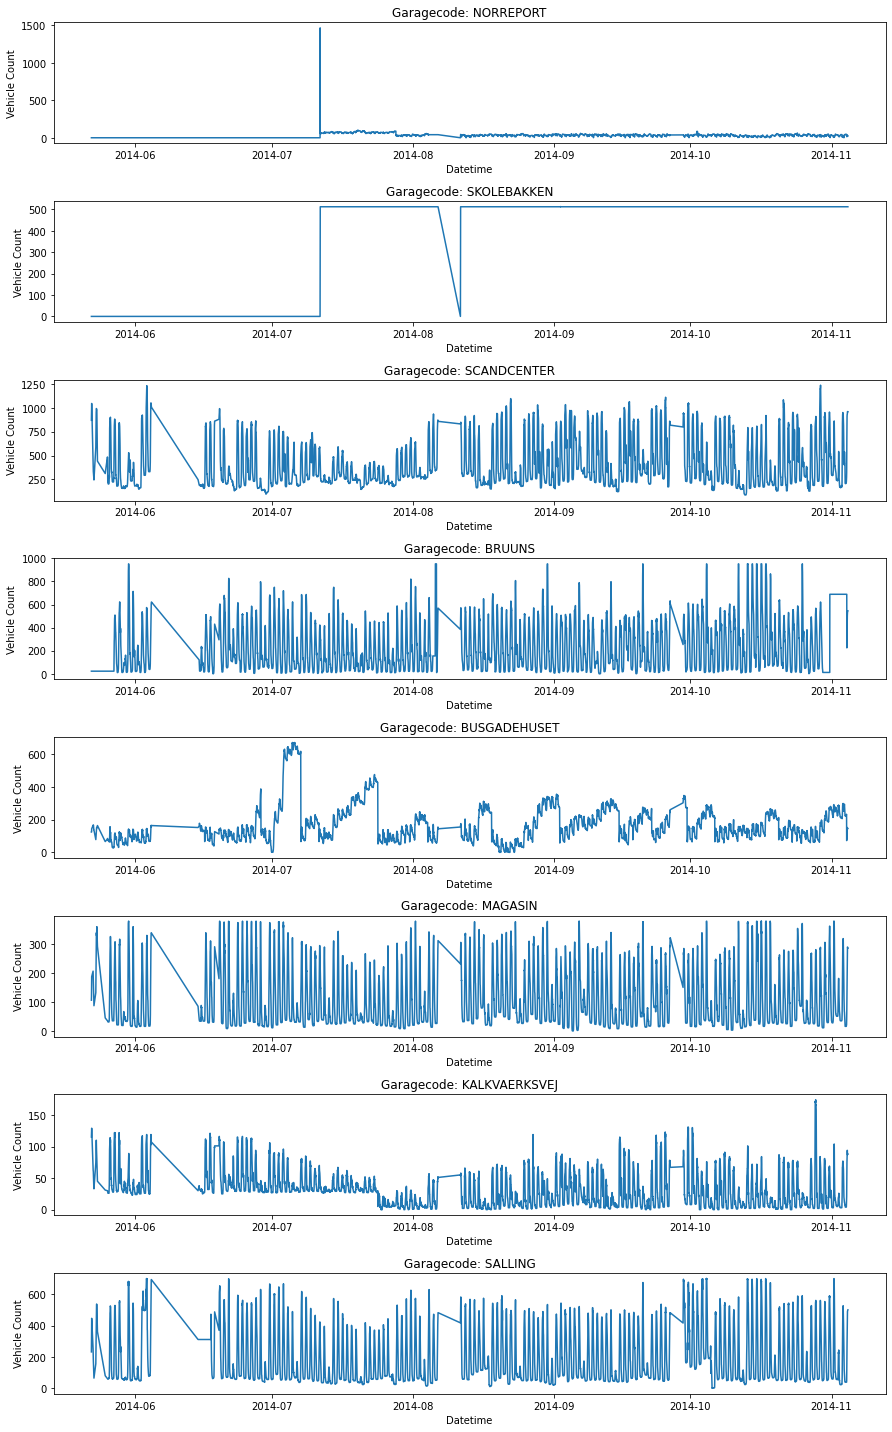

In [20]:
#creating a list of unique garagecodes
garagecodes = df['garagecode'].unique()

#creating subplots for each garagecode
fig, axs = plt.subplots(len(garagecodes), figsize=(12.5,20))

#looping through each garagecode and ploting the vehiclecount data
for i, gc in enumerate(garagecodes):
    # subset the data for the current garagecode
    data = df[df['garagecode'] == gc]
    # plot the data on the corresponding subplot
    axs[i].plot(data['cleaned_updatetime'], data['vehiclecount'])
    axs[i].set_title('Garagecode: {}'.format(gc))
    axs[i].set_xlabel('Datetime')
    axs[i].set_ylabel('Vehicle Count')

# adjust the subplots to avoid overlapping labels
fig.tight_layout()

# show the plot
plt.show()

## Saving cleaned data

In [22]:
# specify the path and filename for the output CSV file
output_path = '/Users/anees/Documents/IOT/Final Project/clean_data.csv'

# write the cleaned data from df into the CSV file
df.to_csv(output_path, index=False)

# Deep Learning Model

In [9]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Read data from CSV file
df = pd.read_csv('clean_data.csv')

In [10]:
# Convert the datetime column to datetime objects
df['cleaned_updatetime'] = pd.to_datetime(df['cleaned_updatetime'])

# Convert the datetime column to Unix/epoch time
df['unix'] = df['cleaned_updatetime'].apply(lambda x: x.timestamp())

# Add day of week and time of day features
df['day_of_week'] = df['cleaned_updatetime'].dt.dayofweek
df['time_of_day'] = df['cleaned_updatetime'].dt.hour * 60 + df['cleaned_updatetime'].dt.minute

In [11]:
# Define model parameters
ph = 60 
ph_index = int(ph/60) # Prediciting 1hr into the future
mu = 0.9

In [12]:
# Create a list of unique garage codes
garagecodes = df['garagecode'].unique()

# ===========================================================

# Linear Regression(Time serires)

R-squared for Garage Code NORREPORT is 0.6965674185910368
R-squared for Garage Code SKOLEBAKKEN is 0.9982571425861092
R-squared for Garage Code SCANDCENTER is 0.725550948291787
R-squared for Garage Code BRUUNS is 0.7226812681728658
R-squared for Garage Code BUSGADEHUSET is 0.9626316300287737
R-squared for Garage Code MAGASIN is 0.6815571970419017
R-squared for Garage Code KALKVAERKSVEJ is 0.7360924328782172
R-squared for Garage Code SALLING is 0.6997798157469606


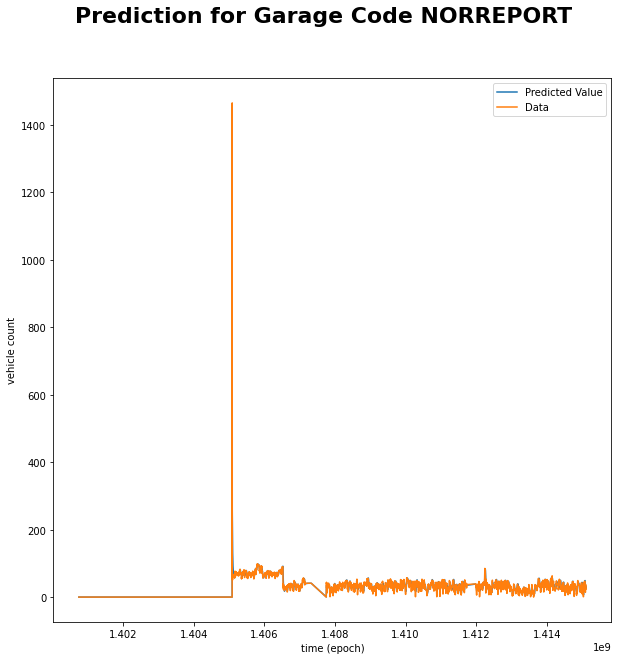

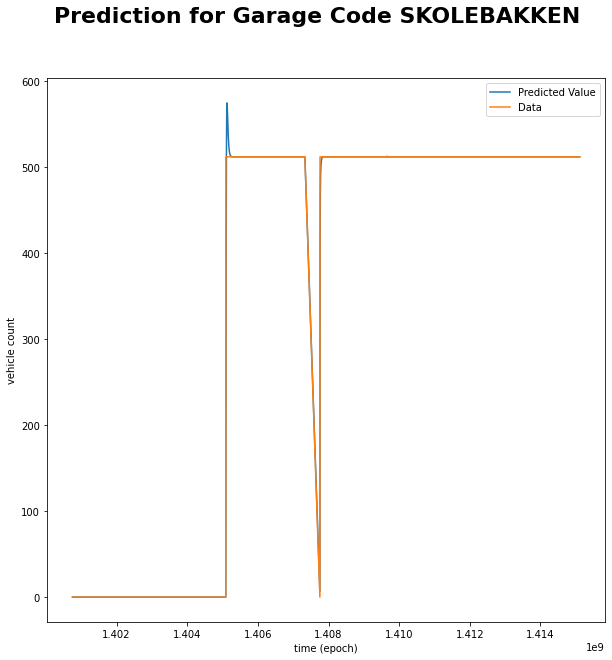

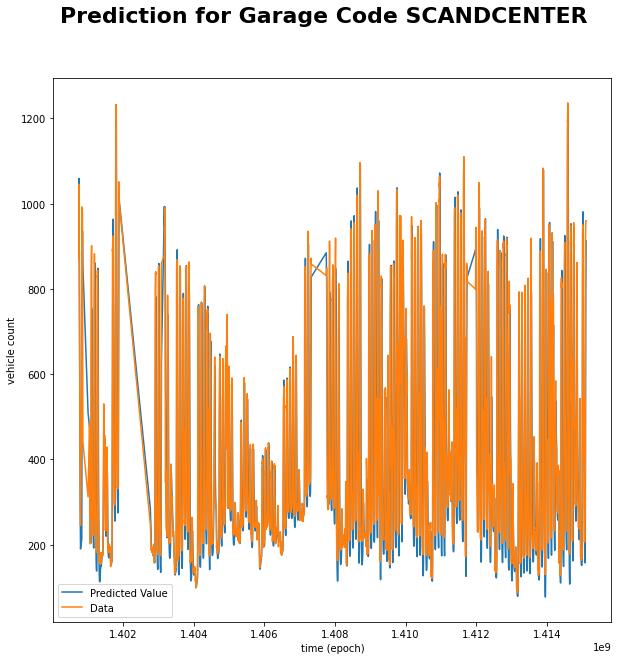

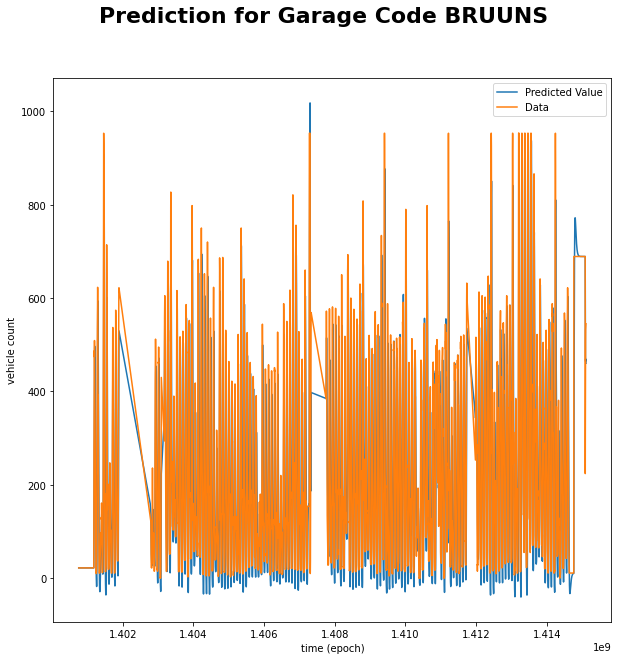

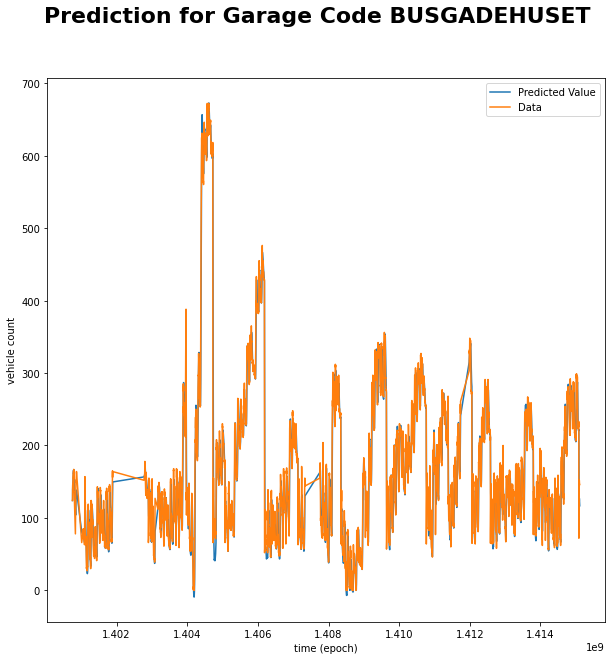

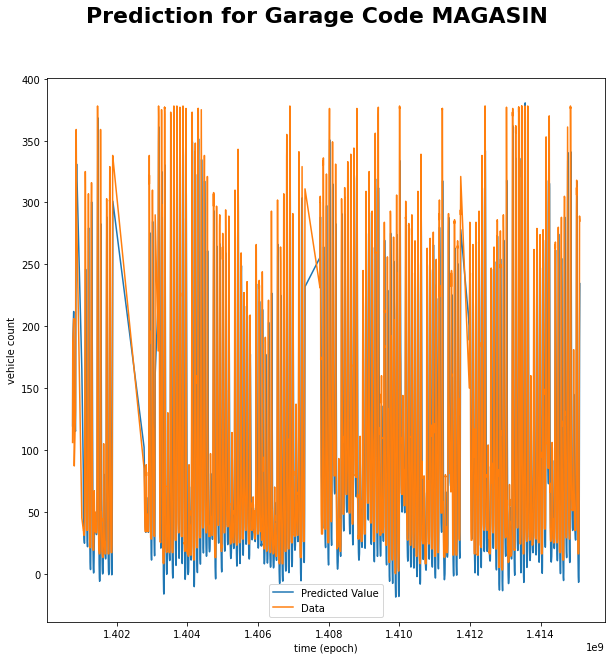

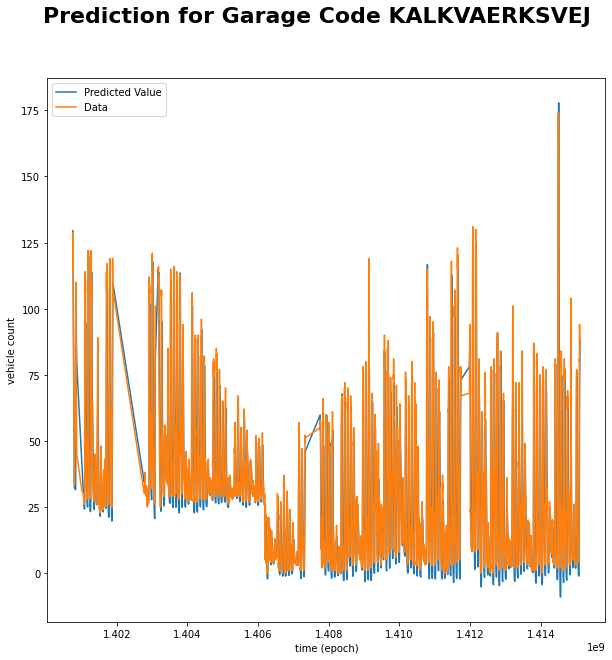

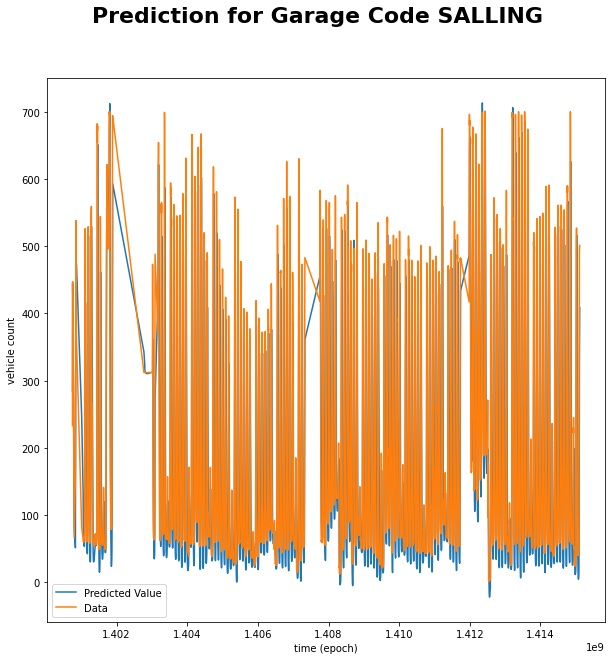

In [14]:
# Loop through each unique garage code
for code in garagecodes:
    
    # Create a new DataFrame for the current garage code
    garage_df = df[df['garagecode'] == code]
    
    # Extract the timestamp and vehicle count columns
    ts = pd.DataFrame(garage_df.unix)
    ys = pd.DataFrame(garage_df.vehiclecount)
    
    # Arrays to hold predicted values
    tp_pred = np.zeros(len(garage_df)-1)
    yp_pred = np.zeros(len(garage_df)-1)
    n_s = len(garage_df)
    
    for i in range(2, n_s+1):
        ts_tmp = ts[0:i]
        ys_tmp = ys[0:i]
        ns = len(ys_tmp)
        weights = np.ones(ns)*mu
        
        for k in range(ns):
            weights[k] = weights[k]**k
        weights = np.flip(weights, 0)
        lm_tmp = LinearRegression()
        
        model_tmp = lm_tmp.fit(ts_tmp, ys_tmp, sample_weight= weights)
        m_tmp = model_tmp.coef_
        q_tmp = model_tmp.intercept_
        
        tp = ts.iloc[i,0] + ph
        yp = m_tmp*tp + q_tmp
        tp_pred[i-2] = tp
        yp_pred[i-2] = yp

    # Plot the predicted values and actual values for the current garage code
    fig, ax = plt.subplots(figsize=(10,10))
    fig.suptitle(f'Prediction for Garage Code {code}', fontsize=22, fontweight='bold')
    ax.plot(tp_pred, yp_pred, label='Predicted Value') 
    ax.plot(ts.iloc[0:n_s,0], ys.iloc[0:n_s,0], label='Data') 
    ax.set_xlabel('time (epoch)')
    ax.set_ylabel('vehicle count')
    ax.legend()

    # Calculate R-squared of predictions for the current garage code
    r2_val = r2_score(ys['vehiclecount'][ph_index:n_s+ph_index-1], yp_pred)
    print(f"R-squared for Garage Code {code} is {r2_val}")


# =========================================================

# RNN Model

2023-05-07 09:18:21.124542: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-07 09:18:28.158747: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


44/44 [==============================] - 1s 5ms/step
R-squared for Garage Code NORREPORT is 0.7193469246149179


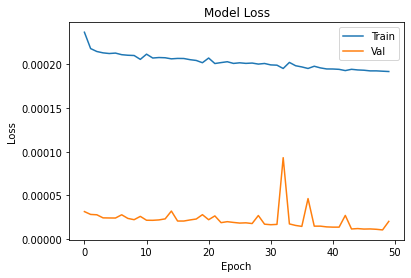

44/44 [==============================] - 1s 4ms/step
R-squared for Garage Code SKOLEBAKKEN is 0.0


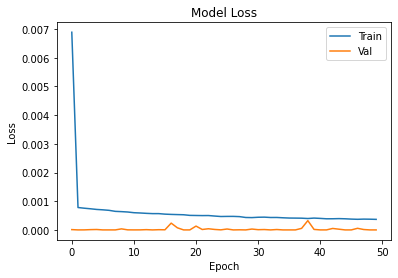

44/44 [==============================] - 1s 4ms/step
R-squared for Garage Code SCANDCENTER is 0.9851415733884378


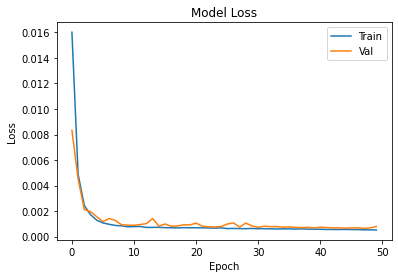

44/44 [==============================] - 1s 4ms/step
R-squared for Garage Code BRUUNS is 0.9790876186425254


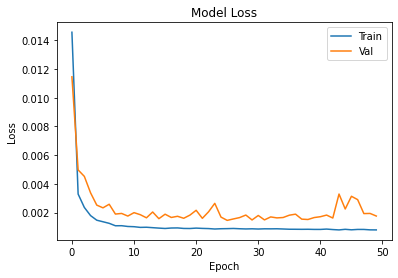

44/44 [==============================] - 1s 4ms/step
R-squared for Garage Code BUSGADEHUSET is 0.9708500490876351


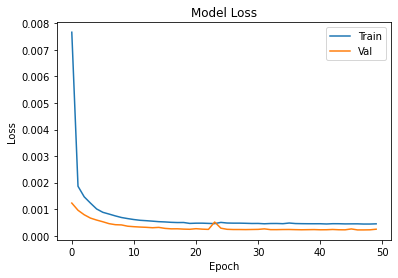

44/44 [==============================] - 1s 4ms/step
R-squared for Garage Code MAGASIN is 0.9905515847925991


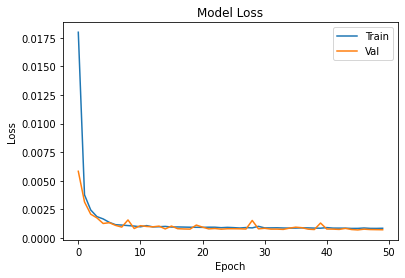

44/44 [==============================] - 1s 4ms/step
R-squared for Garage Code KALKVAERKSVEJ is 0.9772784212200986


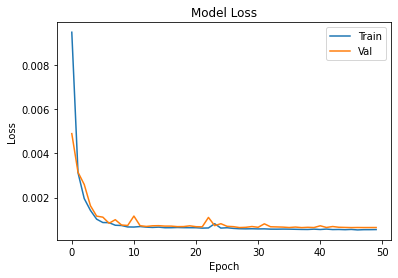

44/44 [==============================] - 1s 4ms/step
R-squared for Garage Code SALLING is 0.9942978974636187


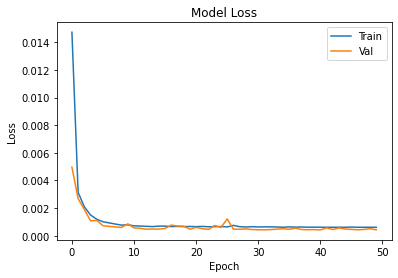

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Read data from CSV file
df = pd.read_csv('clean_data.csv')

# Convert the datetime column to datetime objects
df['cleaned_updatetime'] = pd.to_datetime(df['cleaned_updatetime'])
# Convert the datetime column to Unix/epoch time
df['unix'] = df['cleaned_updatetime'].apply(lambda x: x.timestamp())

# Define sequence length and number of features
seq_len = 24
n_features = 1

# Create a list of unique garage codes
garagecodes = df['garagecode'].unique()
# Loop through each unique garage code
for code in garagecodes:
    
    # Create a new DataFrame for the current garage code
    garage_df = df[df['garagecode'] == code]
    # Extract the vehicle count values for the current garage code
    data = garage_df['vehiclecount'].values.reshape(-1, 1)
    
    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data)
    
    # Split the data into sequences of fixed length
    X = []
    y = []
    for i in range(seq_len, len(data)):
        X.append(data[i-seq_len:i, 0])
        y.append(data[i, 0])
    X, y = np.array(X), np.array(y)
    
    # Split the data into training and validation sets
    train_size = int(len(X) * 0.8)
    X_train, y_train = X[:train_size], y[:train_size]
    X_val, y_val = X[train_size:], y[train_size:]
    
    # Reshape the data to be compatible with the RNN
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
    X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], n_features))
    
    # Define the RNN architecture
    model = keras.Sequential([
        keras.layers.LSTM(64, input_shape=(seq_len, n_features)),
        keras.layers.Dense(1)
    ])
    
    # Compile the model
    model.compile(loss='mean_squared_error', optimizer='adam')
    # Fit the model to the training data
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=0)
    
    # Evaluate the model on the validation data
    y_pred = model.predict(X_val)
    y_pred = scaler.inverse_transform(y_pred)
    y_val = scaler.inverse_transform(y_val.reshape(-1, 1))
    r2_val = r2_score(y_val, y_pred)
    print(f"R-squared for Garage Code {code} is {r2_val}")

    # Visualize the training and validation loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')
    plt.show()